In [26]:
import pandas

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['xtick.labelsize'] = '14'
plt.rcParams['ytick.labelsize'] = '14'

%matplotlib notebook

In [27]:
# Replace this variable accordingly 
path_to_results = "../../experiments/BiVar/2018-11-10-18-25_BiVarPowerDiscrete_/"

In [28]:
data = pandas.read_csv(path_to_results + "BiVarPowerDiscrete.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

In [29]:
data["nDim"].unique()

array([2])

In [30]:
data['d'].unique()

array([100,  50,  10,   5,   3,   1])

In [31]:
data["testId"].unique()

array(['Correlation', 'Slope', 'Slope Inversion', 'Mutual Information',
       'Distance Correlation', 'Jensen Shannon Equity Width',
       'Kendalls Tau', 'Spearman Correlation', 'MWPr', 'MCE', 'MWPu',
       'MWP', 'KS', 'HoeffdingsD', 'Surfing', 'HSM'], dtype=object)

In [32]:
data["category"].unique()

array(['0', 'Sine_1', 'Linear', 'Sine_5', 'Hypercube', 'Independent',
       'Star', 'Parabolic_1', 'Zinv', 'DoubleLinear_0.25', 'Hourglass',
       'HypercubeGraph', 'Cross', 'HyperSphere'], dtype=object)

In [33]:
selectedCategories = ["Cross", 'DoubleLinear_0.25', 'Hourglass', 'Hypercube', 'HypercubeGraph', 'HyperSphere',
                     'Linear', 'Parabolic_1', 'Sine_1', 'Sine_5', 'Star', 'Independent', "Zinv"]

In [34]:
selecteCategoriesDict = {
    'Linear' : "L",
    'Sine_1' : "S1", 
    'Sine_5' : "S5", 
    'Hypercube' : "Hc", 
    'DoubleLinear_0.25': "Dl", 
    "Cross": "C",
    'Hourglass' : "H", 
    'HyperSphere' : "Hs",
    'Parabolic_1' : "P", 
    'Star' : "St",
    'Zinv' : "Zi", 
    "Independent" : "I",
    'HypercubeGraph' : "HcG", 
}

In [35]:
# selected tests are all beside MWPu & MWPr
selectedTestDict = {
    "Correlation" : "Cor", 
    "Mutual Information" : "MI", 
    "Jensen Shannon Equity Width" : "EW",
    "Distance Correlation" : "DCor", 
    "Slope" : "S", 
    "Slope Inversion" : "SI", 
    "Kendalls Tau" : "Tau", 
    "Spearman Correlation" : "SCor", 
    "MCE" : "MCE", 
    "MWP" : "MWP", 
    "KS" : "KS", 
    "HoeffdingsD" : "HD", 
    "Surfing" : "Surf", 
    "HSM" : "HSM"
}

In [36]:
selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData = selectedData[[str(x) not in ["MWPr", "MWPu"] for x in selectedData["testId"]]]
selectedData["category"] = [selecteCategoriesDict[x] for x in selectedData["category"]]
selectedData["testId"] = [selectedTestDict[x] for x in selectedData["testId"]]

In [37]:
selectedData = selectedData.sort_values(["testId","d"])

In [38]:
selectedData["category"].unique()

array(['S1', 'I', 'S5', 'Hs', 'L', 'P', 'Dl', 'H', 'Zi', 'Hc', 'C', 'HcG',
       'St'], dtype=object)

In [39]:
selectedData["testId"].unique()

array(['Cor', 'DCor', 'EW', 'HD', 'HSM', 'KS', 'MCE', 'MI', 'MWP', 'S',
       'SCor', 'SI', 'Surf', 'Tau'], dtype=object)

## Fig 9: Power and average score of each approach w.r.t. .\omega

### Power

In [40]:
tests = ['MWP', 'KS', 'Cor', 'SCor', 'DCor', 'Tau', 'EW', 'HD', 'MI', 'S', 'SI', 'MCE', 'Surf', 'HSM']

<IPython.core.display.Javascript object>


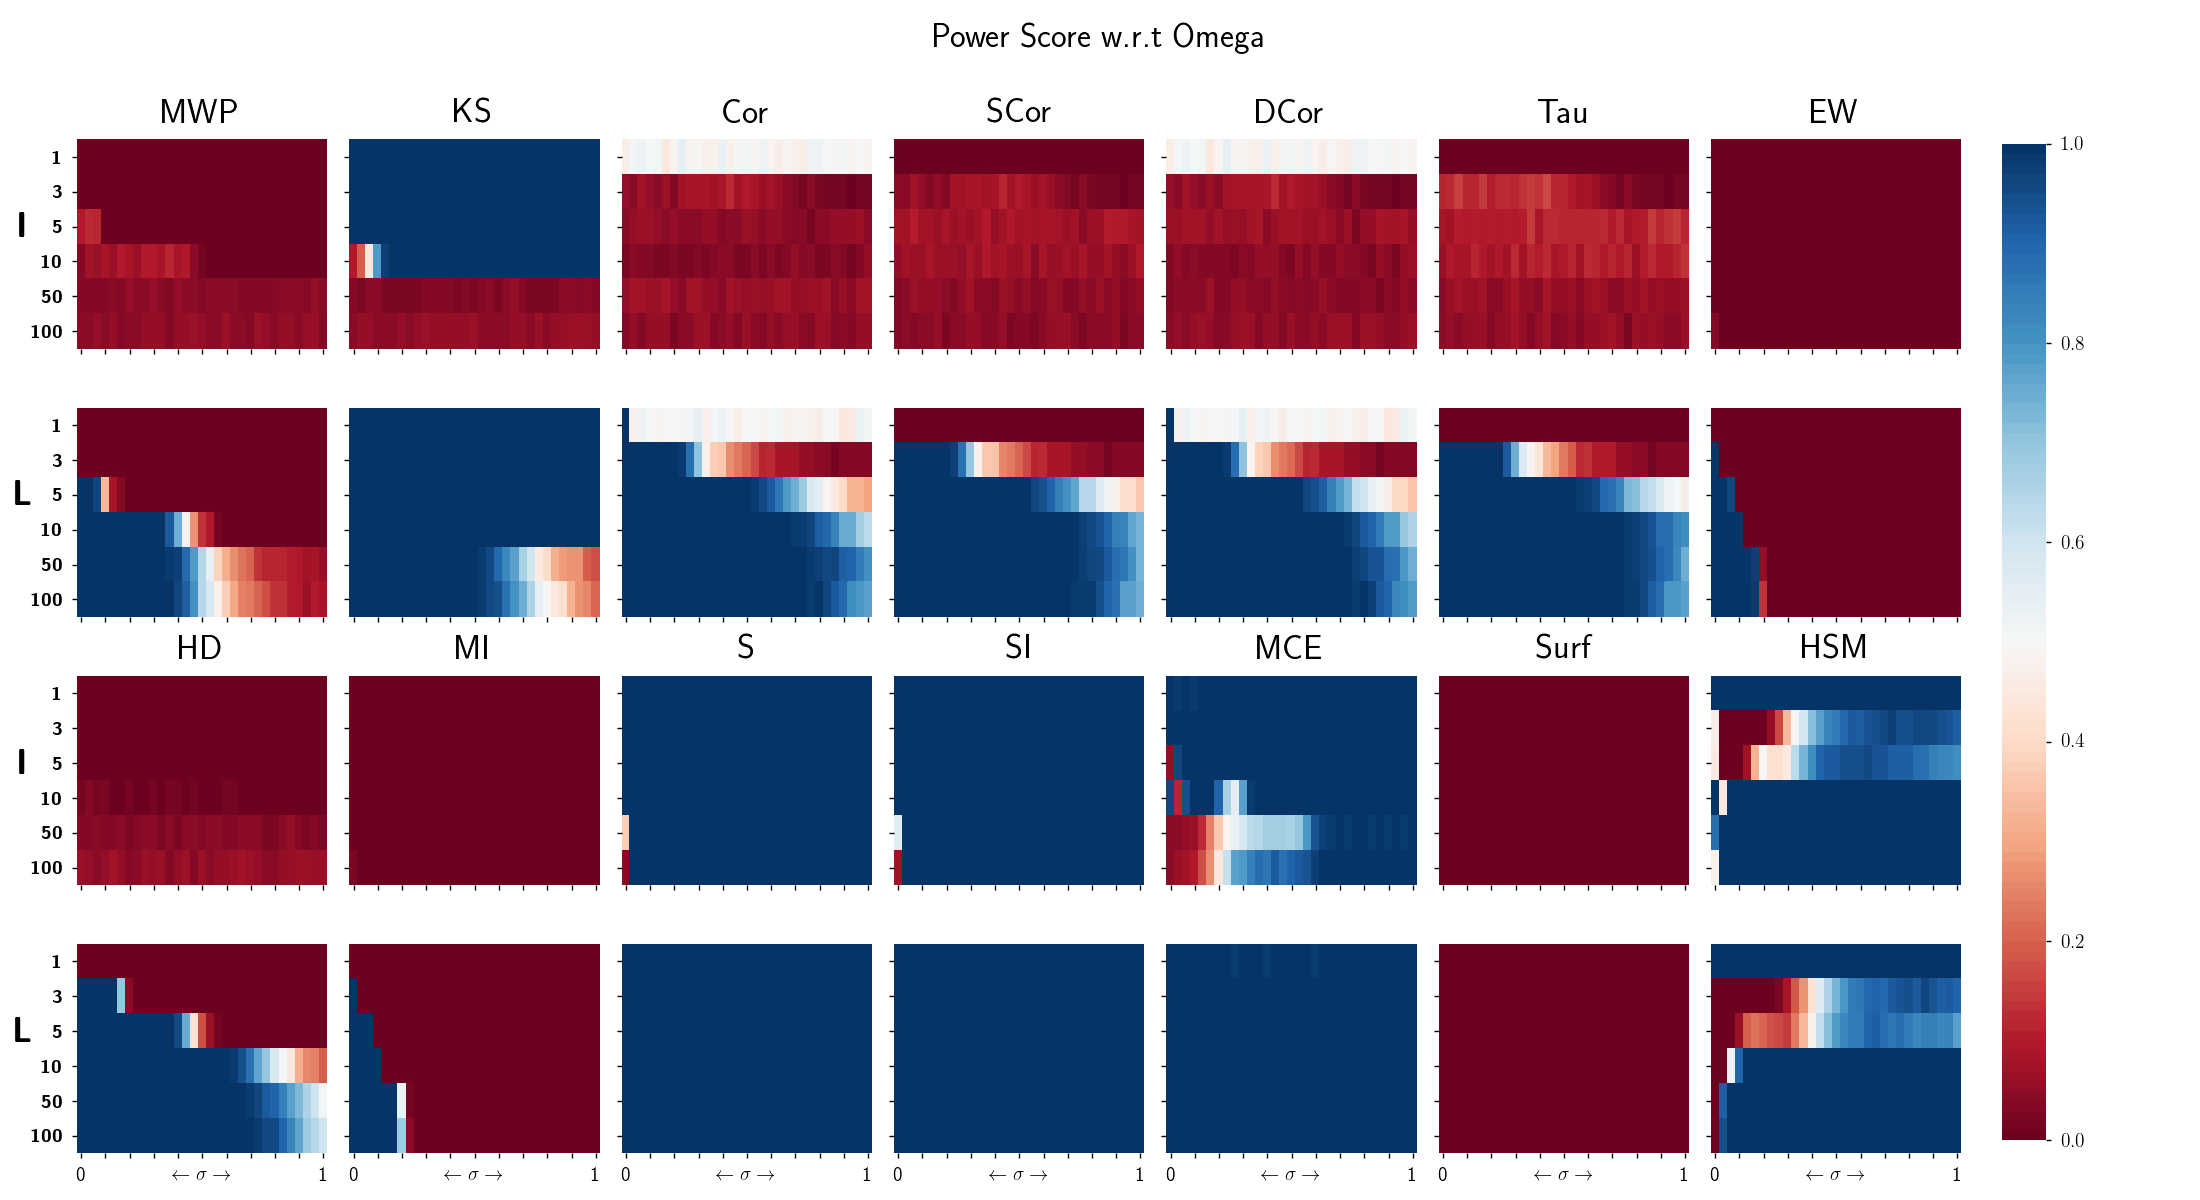

/Users/Mazan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [41]:
fig, axes = plt.subplots(nrows=4, 
                         ncols=7,
                         figsize=(22,12), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax = fig.add_axes([.91, 0.05, .02, 0.83])

fig.suptitle("Power Score w.r.t Omega", size = 24)

measure = "powerAt95"
nDim = 2

tests1 = tests[:7]
for i,x in enumerate(["I", "L"]):
    for j,y in enumerate(tests):
        subdata = selectedData[(selectedData["category"] == x) & 
                               (selectedData["testId"] == y) & 
                               (selectedData["nDim"] == nDim) &
                               selectedData["d"].isin([1,3,5,10,50,100]) ]
        d = subdata.groupby(["noise","d"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "d"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)
        
        row_offset = 2 if int(j / 7) == 1 else 0

        ax = axes[i + row_offset][j % 7]

        sns.heatmap(dd, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=i == 0, cbar_ax=None if i else cbar_ax,
                   vmin=0, vmax=1)

        ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
        ax.set_title(r'%s - %s'%(x, y), y=1.04)
        ax.set_ylabel("")
        sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
        labels = ["0"] + sp + [""] + sp + [""] + sp + [""] + sp + [""] + sp + ["1"]
        labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
        ax.set_xticklabels(labels)
        
        
        if(j % 7 == 0):
            ax.set_ylabel(r'\textbf{%s}'%x, rotation=0, x=0.80)
        else:
            ax.set_ylabel("")
            
        if(i == 1):
            ax.set_xlabel(r'')
        else:
            ax.set_xlabel("")
            
        if(i == 0):
            ax.set_title(r'%s'%(y))
        else:
            ax.set_title("")


plt.tight_layout(rect=[0, 0, .9, 0.93])

fig.savefig("plots/BiVarFig9_1.pdf")

### Average Score

<IPython.core.display.Javascript object>


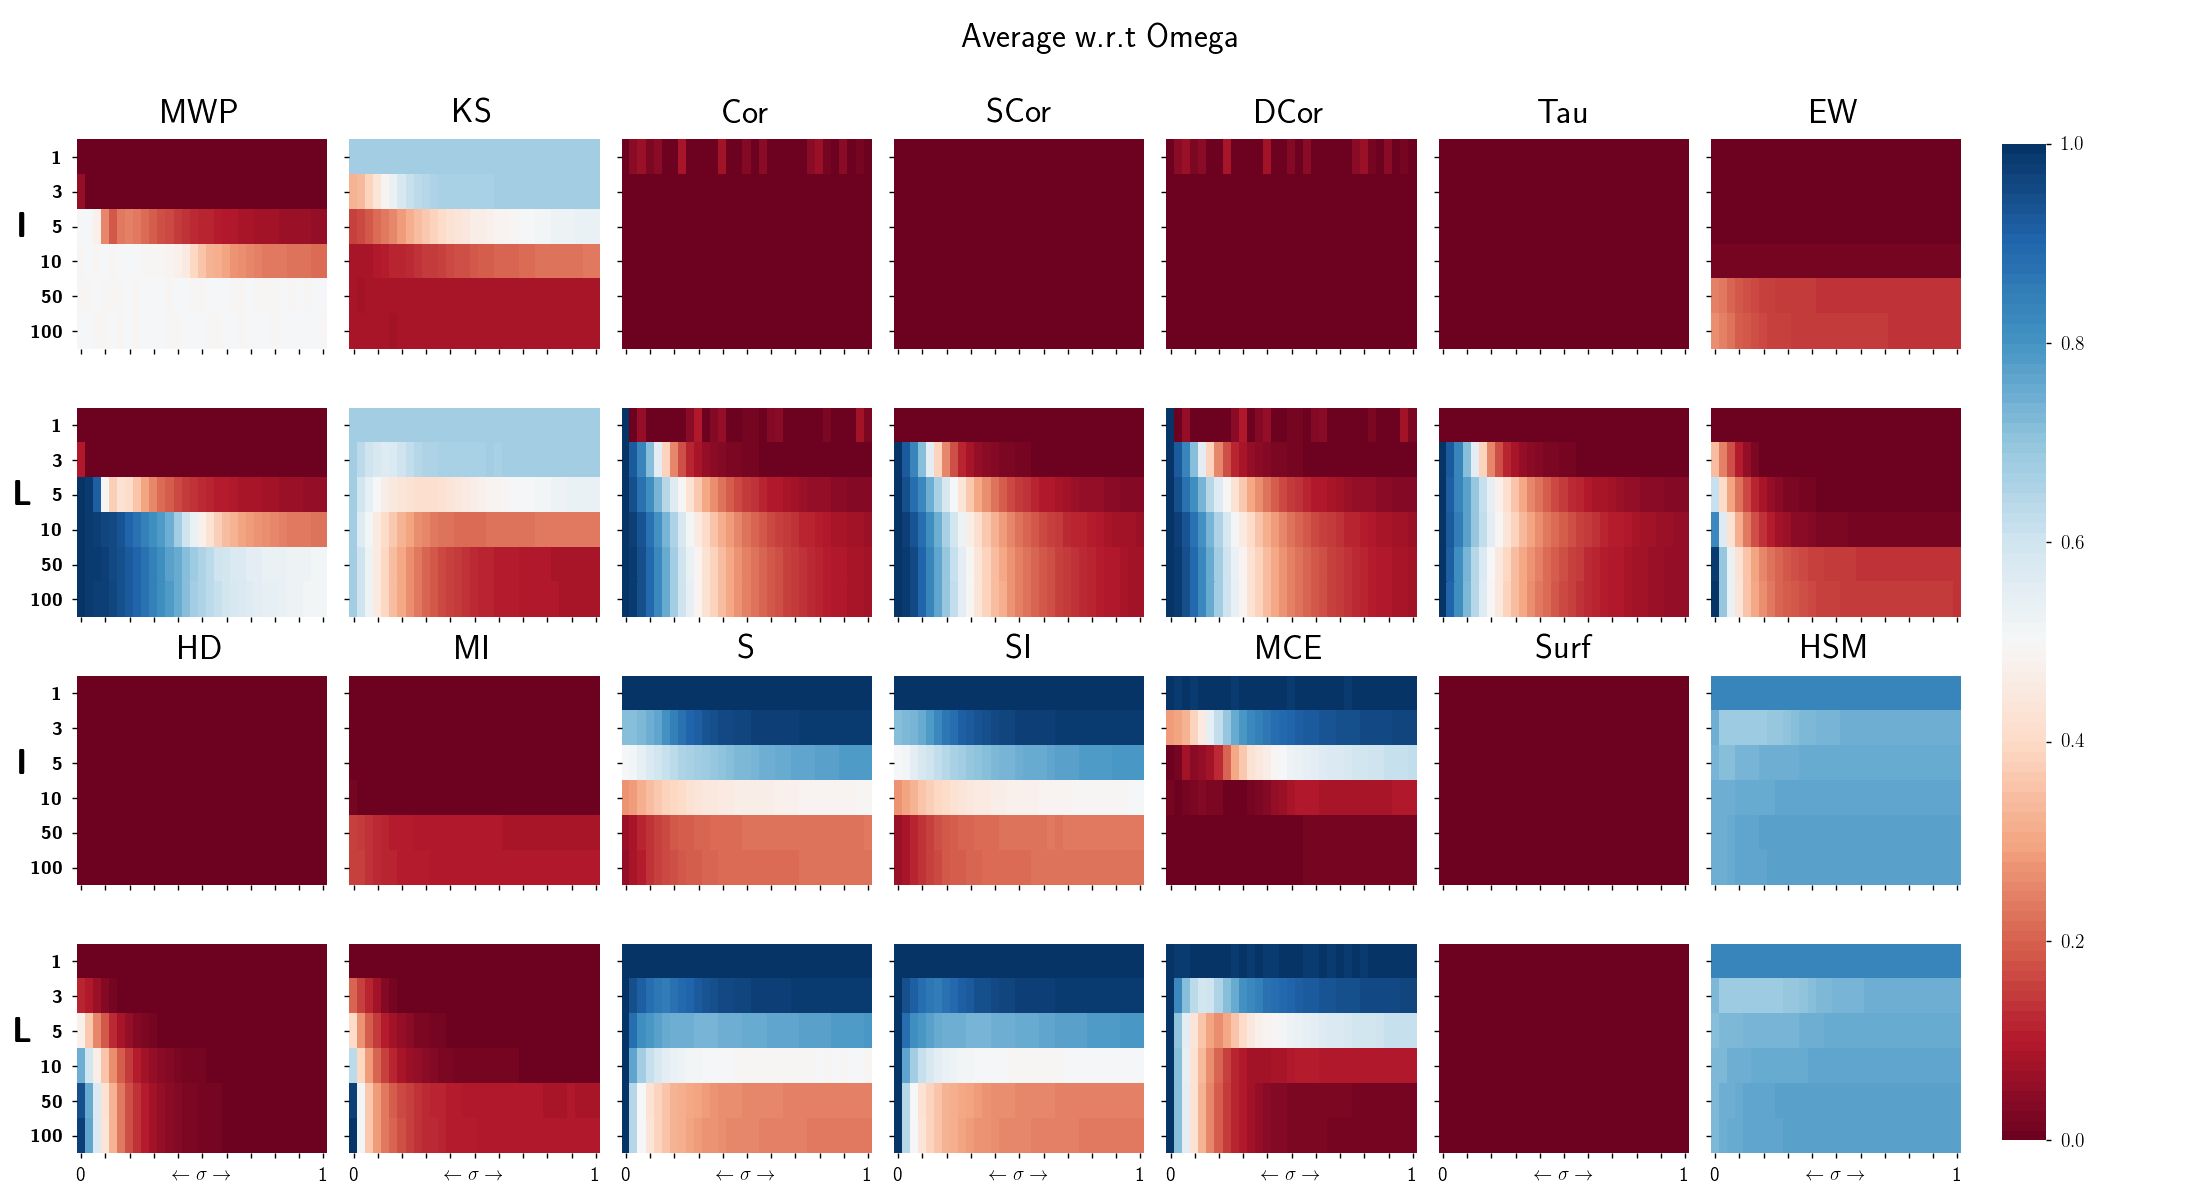

/Users/Mazan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [42]:
fig, axes = plt.subplots(nrows=4, 
                         ncols=7,
                         figsize=(22,12), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax = fig.add_axes([.91, 0.05, .02, 0.83])

fig.suptitle("Average w.r.t Omega", size = 24)

measure = "avgContrast"
nDim = 2

tests1 = tests[:7]
for i,x in enumerate(["I", "L"]):
    for j,y in enumerate(tests):
        subdata = selectedData[(selectedData["category"] == x) & 
                               (selectedData["testId"] == y) & 
                               (selectedData["nDim"] == nDim) &
                               selectedData["d"].isin([1,3,5,10,50,100]) ]
        d = subdata.groupby(["noise","d"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "d"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)
        
        row_offset = 2 if int(j / 7) == 1 else 0

        ax = axes[i + row_offset][j % 7]

        sns.heatmap(dd, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=i == 0, cbar_ax=None if i else cbar_ax,
                   vmin=0, vmax=1)

        ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
        ax.set_title(r'%s - %s'%(x, y), y=1.04)
        ax.set_ylabel("")
        sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
        labels = ["0"] + sp + [""] + sp + [""] + sp + [""] + sp + [""] + sp + ["1"]
        labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
        ax.set_xticklabels(labels)
        
        
        if(j % 7 == 0):
            ax.set_ylabel(r'\textbf{%s}'%x, rotation=0, x=0.80)
        else:
            ax.set_ylabel("")
            
        if(i == 1):
            ax.set_xlabel(r'')
        else:
            ax.set_xlabel("")
            
        if(i == 0):
            ax.set_title(r'%s'%(y))
        else:
            ax.set_title("")


plt.tight_layout(rect=[0, 0, .9, 0.93])

fig.savefig("plots/BiVarFig9_2.pdf")